Modeling the effect of electrolyte properties on discharge capacity and degradation (cycle life)

In [1]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt

Set up model with SEI growth

In [2]:
parameter_values = pybamm.ParameterValues("Marquis2019")
parameter_values["Electrolyte conductivity [S.m-1]"] = pybamm.InputParameter("sigma_e")

model = pybamm.lithium_ion.DFN({
    "SEI": "solvent-diffusion limited"
})

sigmas = np.arange(0.5,1.3,0.1)

### Capacity during 4C discharge

In [3]:
discharge = pybamm.Experiment([
    "Discharge at 4C until 3.3V",
])

sim = pybamm.Simulation(model, experiment=discharge, parameter_values=parameter_values)
sols = []
for sigma_e in sigmas:
    sol = sim.solve(inputs={"sigma_e": sigma_e}, initial_soc=1)
    sols.append(sol)

Plot every 3rd solution

In [4]:
pybamm.dynamic_plot(sols[::3])

interactive(children=(FloatSlider(value=0.0, description='t', max=1006.0112885659204, step=10.060112885659203)…

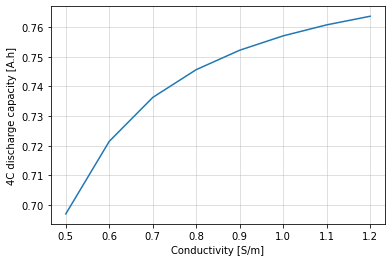

In [5]:
caps = [sol["Discharge capacity [A.h]"].data[-1] for sol in sols]
fig, ax = plt.subplots()
ax.plot(sigmas, caps)
ax.set_xlabel("Conductivity [S/m]")
ax.set_ylabel("4C discharge capacity [A.h]")
ax.grid(alpha=0.5)

### Degradation during CCCV charge

In [6]:
charge = pybamm.Experiment([
    "Charge at 4C until 4.1V",
    "Hold at 4.1V until C/50",
])

sim = pybamm.Simulation(model, experiment=charge, parameter_values=parameter_values)
sols = []
for sigma_e in sigmas:
    sol = sim.solve(inputs={"sigma_e": sigma_e}, initial_soc=0)
    sols.append(sol)

The linesearch algorithm failed with too small a step.


Plot every 3rd solution

In [7]:
pybamm.dynamic_plot(sols[::3], 
                    ["Terminal voltage [V]", 
                     "Loss of lithium inventory [%]"])

interactive(children=(FloatSlider(value=0.0, description='t', max=3327.568204280149, step=33.27568204280149), …

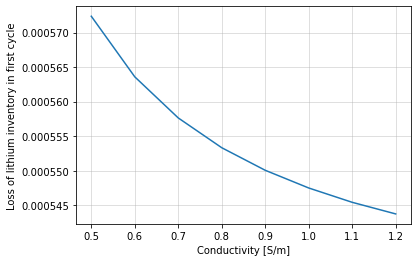

In [8]:
LLIs = [sol["Loss of lithium inventory [%]"].data[-1] for sol in sols]
fig, ax = plt.subplots()
ax.plot(sigmas, LLIs)
ax.set_xlabel("Conductivity [S/m]")
ax.set_ylabel("Loss of lithium inventory in first cycle")
ax.grid(alpha=0.5)